# QISKIT QUICKSTART

### Thisnotebook is prepared to get a quick walkthrough of Qiskit (2.3.0) which resies in the Quantum_Zone environment.

---

## BUILD YOUR CIRCUIT

In [1]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler

qc=QuantumCircuit(2) # 2 qubits
qc.h(0)# Hadamard gate at qubit 0
qc.cx(0, 1)# CNOT gate at qubit 0 and qubit 1
qc.measure_all()# Measure all qubits

sampler = StatevectorSampler()
result = sampler.run([qc], shots=1024).result()
print(result[0].data.meas.get_counts())
qc.draw()

{'11': 501, '00': 523}


┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

##### ->This is a basic quatum circuit which aims to create an entangled state where we have applied the hadamard gate to the first qubit and then applied the CNOT gate to the second qubit before measuring both the qubits. 

##### ->What we have created is called a Bell state where our 2 qubit system is entangled. We first apply the hadamard gate to the first qubit to create a superposition of states. Then we apply the CNOT gate to the qubits to create an entangled state.

##### ->The qubits get entangled becaue we are copying the uncertainity from the first qubit to the second qubit, in some sense. so H creates the uncertainty and CNOT copies it as it makes the second qubit dependent on the first qubit.

##### StatevectorSampler is a sampler primitive that:
##### •	Simulates a quantum circuit
##### •	Computes the exact statevector
##### •	Generates measurement samples from that statevector
##### •	Runs locally (no noise, no hardware backend)

##### StatevectorSampler is a sampler primitive that computes the exact final quantum state and samples measurement results from the probability distribution of that state.

##### Since it is noiseless and exact:
#####	•	Perfect for learning quantum mechanics
#####	•	Verifying circuit correctness
#####	•	Checking if your algorithm works ideally

##### If something fails here, the issue is in your logic — not noise.

##### Used heavily when building:
#####	•	Grover’s algorithm
#####	•	VQE
#####	•	QAOA
#####	•	Quantum teleportation
#####	•	Entanglement protocols


---

## VISUALIZE YOUR RESULTS

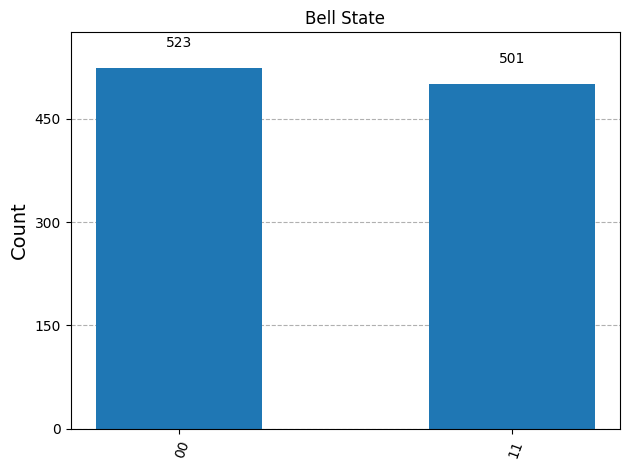

In [2]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

counts = result[0].data.meas.get_counts()
plot_histogram(counts)
plot_histogram(counts, title="Bell State")

---

## Now we try to build an entanglement state of 3 qubits.

##### Adding a third qubit to the circuit and adding a CNOT gate between the second and third qubits qc.cx(1,2 )

In [8]:

qc1=QuantumCircuit(3) # 2 qubits
qc1.h(0)# Hadamard gate at qubit 0
qc1.cx(0, 1)# CNOT gate at qubit 0 and qubit 1
qc1.cx(1, 2)# CNOT gate at qubit 1 and qubit 2
qc1.measure_all()# Measure all qubits

sampler = StatevectorSampler()
result = sampler.run([qc1], shots=1024).result()
print(result[0].data.meas.get_counts())
qc1.draw()

{'000': 528, '111': 496}


┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────────░─┤M├──────
        └───┘┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

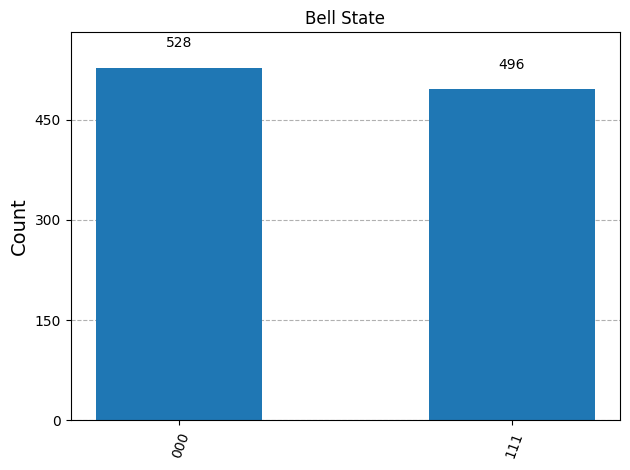

In [9]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

counts = result[0].data.meas.get_counts()
plot_histogram(counts)
plot_histogram(counts, title="Bell State")

---
